In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from glob import glob
import os
import scipy.io
from numpy.linalg import norm
import math
import seaborn as sns; sns.set()

### Evaluate the effect of down-sampling

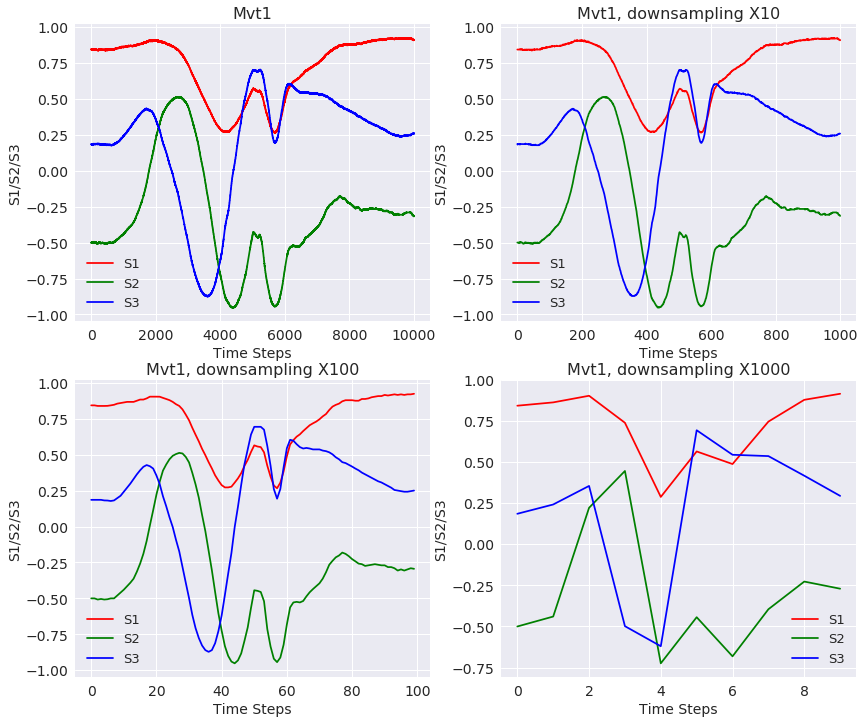

In [2]:
def plot_single_trace(mvt_traces, factor, title):
    Y1 = mvt_traces[0, :][0::factor]
    Y2 = mvt_traces[1, :][0::factor]
    Y3 = mvt_traces[2, :][0::factor]
    n = np.shape(Y1)[0]
    X = range(n)
    plt.plot(X, Y1, 'r')
    plt.plot(X, Y2, 'g')
    plt.plot(X, Y3, 'b')
    plt.title(title, fontsize = 16)
    plt.legend(['S1', 'S2', 'S3'], fontsize = 13)
    plt.xlabel('Time Steps', fontsize = 14)
    plt.ylabel('S1/S2/S3', fontsize = 14)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)

data = np.load('data/mvt_1_samp.npz')
mvt1 = data['X'][0, :, :]
plt.figure(figsize = (14, 12))
plt.subplot(2, 2, 1)
plot_single_trace(mvt1, 1, 'Mvt1')
plt.subplot(2, 2, 2)
plot_single_trace(mvt1, 10, 'Mvt1, downsampling X10')
plt.subplot(2, 2, 3)
plot_single_trace(mvt1, 100, 'Mvt1, downsampling X100')
plt.subplot(2, 2, 4)
plot_single_trace(mvt1, 1000, 'Mvt1, downsampling X1000')


### Visualize the different SOP traces generated by same Robot Arm Movement

number of sample  4 , dimension: 3 , time steps: 10000


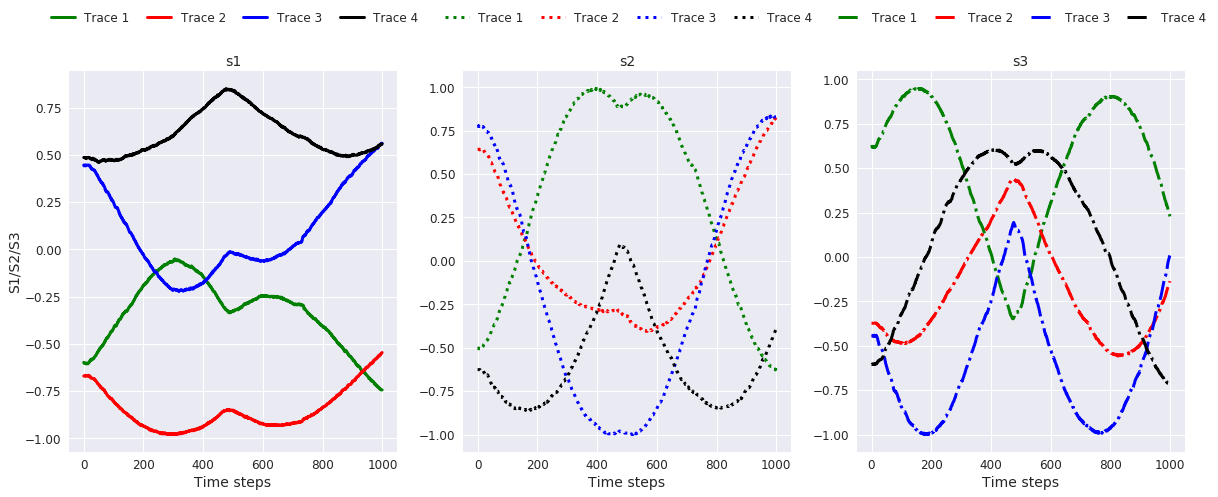

In [4]:
data = np.load('data/mvt_2_samp.npz')
arr = data['X']
num_samples, dim, steps = arr.shape
print('number of sample ', num_samples, ', dimension:', dim, ', time steps:', steps)
# plot sample of traces for a given movement
color =['g', 'r', 'b', 'k']
line = ['', ':', '-.']
plt.figure(figsize=(20, 7))
plt.legend(['Trace 1','Trace 2', 'Trace 3', 'Trace 4'],
           fontsize = 18,
          bbox_to_anchor=(-0.07, 1.01, 1.15, .102), loc=4,
       ncol=4, mode="expand", borderaxespad=0.)
plt.grid()
for s in range(3): # loop through each dimenson (s1, s2, s3)
    plt.subplot(1, 3, s + 1)
    for i in range(num_samples):
        plt.plot(arr[i, s, ::10], color[i] + line[s], linewidth =3)
    plt.title('s'+str(s+1), fontsize = 14)    
    plt.xlabel('Time steps', fontsize = 14)
    plt.legend(['Trace 1','Trace 2', 'Trace 3', 'Trace 4'],
           fontsize = 12,
          bbox_to_anchor=(-0.07, 1.11, 1.15, .102), loc=4,
       ncol=4, mode="expand", borderaxespad=0.)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
   
    if s == 0:
        plt.ylabel('S1/S2/S3', fontsize = 14)
plt.show()

#### Plot the same set of traces on Poincare Sphere

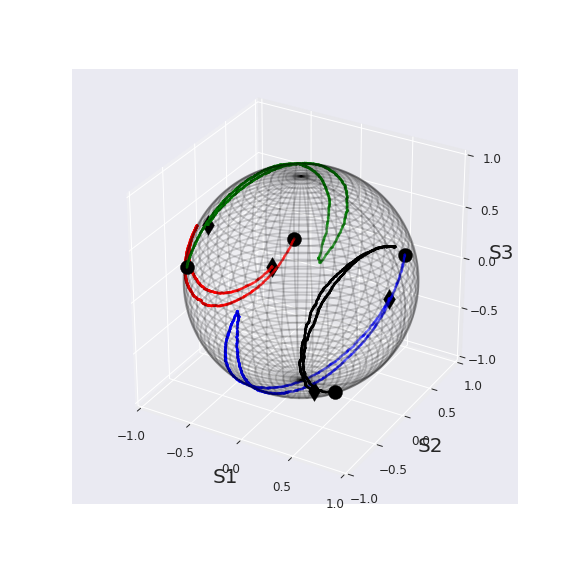

In [5]:
# Plot 
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D

# Create a sphere
r = 1
pi = np.pi
cos = np.cos
sin = np.sin
phi, theta = np.mgrid[0.0:pi:100j, 0.0:2.0*pi:100j]
x = r*sin(phi)*cos(theta)
y = r*sin(phi)*sin(theta)
z = r*cos(phi)
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(x, y, z, color='black', alpha =0.15)

# Plot the traces
for i in range(num_samples):
    xx = arr[i, 0, :]
    xx = xx[::10] # down-sampling by a factor of 20
    yy = arr[i, 1, :]
    yy = yy[::10]
    zz = arr[i, 2, :]
    zz = zz[::10]
    ax.scatter(xx[-1],yy[-1],zz[-1],c='k',  s = 200, marker = 'o') # end of the trace
    ax.scatter(xx[0],yy[0],zz[0], c='k', s = 200, marker = 'd')  # start of the trace    
    if i == 0:
        ax.scatter(xx,yy,zz,c='g', s= 5)
    elif i == 1:
        ax.scatter(xx,yy,zz,c='r', s= 5)
    elif i == 2:
        ax.scatter(xx,yy,zz,c='b', s= 5)
    elif i == 3:    
        ax.scatter(xx,yy,zz,c='k', s= 5)
    else:
        ax.scatter(xx, yy, zz, s = 5)

# Format the axis:        
ax.tick_params(axis="x", labelsize = 12)
ax.tick_params(axis="y", labelsize = 12)
ax.tick_params(axis="z", labelsize = 12)     
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])
ax.set_aspect("equal")
ax.set_xlabel('S1', fontsize = 20)
ax.set_ylabel('S2', fontsize = 20)
ax.set_zlabel('S3', fontsize = 20)
ax.set_xticks([-1, -0.5, 0, 0.5, 1])
ax.set_yticks([-1, -0.5, 0, 0.5, 1])
ax.set_zticks([-1, -0.5, 0, 0.5, 1])
plt.show()